## Data Preparation
1) Download historical data of AXP and SPY from 01/01/2021 to 03/08/2024 from Yahoo Finance.
2) Used the download function from the yfinance library to retrieve the data.

In [4]:
import yfinance as yf

start_date = '2021-01-01'  
end_date = '2024-03-08'

axp_data = yf.download('AXP', start=start_date, end=end_date)
spy_data = yf.download('SPY', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Return Calculation and GARCH(1,1) Model Fitting
1) Calculated returns for AXP and SPY using log return instead of arithematic return.
2) Fitted GARCH(1,1) models using the arch_model function from the arch library and printed model summaries.
3) Calculated the correlation coefficient between AXP and SPY returns, which was found to be 0.6597.

### Log Return Formula

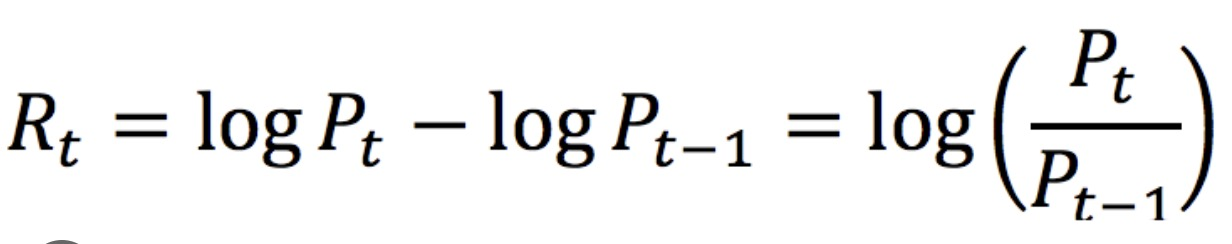

In [5]:
from IPython.display import Image
Image(filename = '/Users/lilyhuang/Desktop/WechatIMG41.jpg', width = 800, height = 800)

### GARCH (1,1)

- The Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model is a statistical model used to estimate the volatility of financial time series data. 
- GARCH(1,1) indicates that the model uses one lag of both the autoregressive and moving average components for the conditional variance.

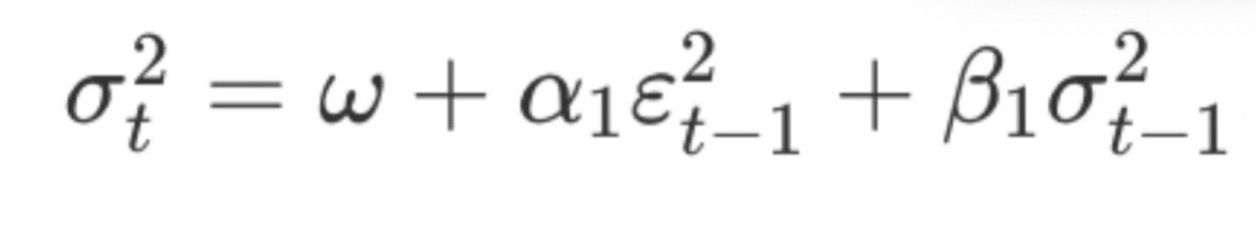

In [6]:
from IPython.display import Image
Image(filename = '/Users/lilyhuang/Desktop/WechatIMG5.jpg', width = 800, height = 800)

### - AXP

In [7]:
import numpy as np
from arch import arch_model

# Calculating the log returns of the 'AXP_Close' prices
axp_returns = np.log(axp_data['Close']).diff().dropna() 
axp_returns

Date
2021-01-05    0.005323
2021-01-06    0.036326
2021-01-07   -0.011442
2021-01-08    0.000986
2021-01-11   -0.005930
                ...   
2024-03-01    0.001093
2024-03-04   -0.003420
2024-03-05   -0.007842
2024-03-06    0.005739
2024-03-07    0.022496
Name: Close, Length: 798, dtype: float64

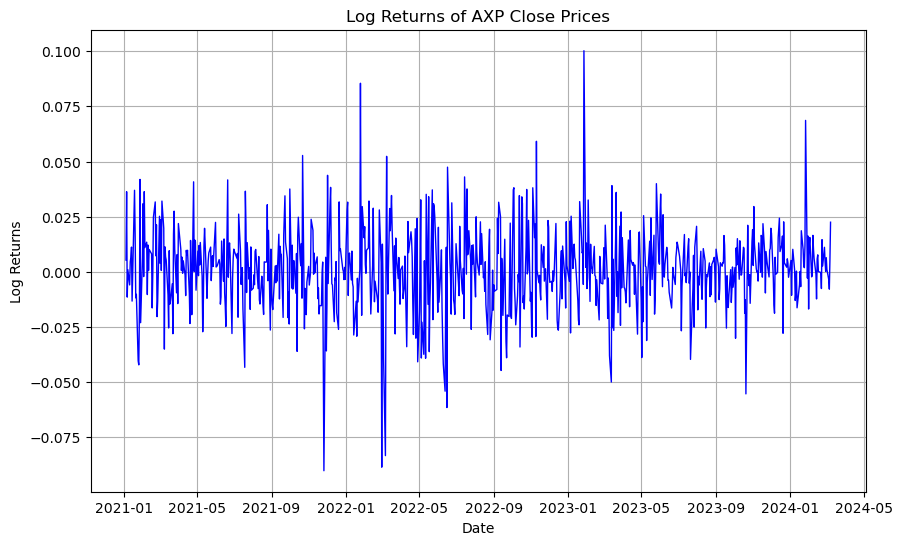

In [8]:
import matplotlib.pyplot as plt

# Assuming axp_returns is already computed as shown
# Plotting the log returns
plt.figure(figsize=(10, 6))
plt.plot(axp_returns, color='blue', linewidth=1)
plt.title('Log Returns of AXP Close Prices')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.grid(True)
plt.show()


In [9]:
# arch_model: This function creates a GARCH model instance. 
# 'p' and 'q' are the orders of the GARCH model. 
# p=1: This is the order of the ARCH component (the lag order of squared residuals).
# q=1: This is the order of the GARCH component (the lag order of conditional variance).

# .fit method: This fits the GARCH(1,1) model to the data contained in axp_returns. 
# update_freq=5: This parameter sets the frequency of output during the model fitting process. 
# It means that the optimization routine will print an update every 5 iterations.

# axp_garch: This variable is assigned the result of fitting the model to the returns data. 
# It contains the fitted model object, including parameter estimates, diagnostics, and other statistics.

# The fit() method returns an object containing the estimation results and various diagnostic information.
# The estimation is done using Maximum Likelihood Estimation (MLE), a common statistical method used to infer parameters of a statistical model.

# In summary, this line of code is initiating and fitting a GARCH(1,1) model to the returns data contained in axp_returns, 
# with updates on the fitting process provided every five iterations. The results of the fitting process are stored in axp_garch.
axp_garch = arch_model(axp_returns, p=1, q=1).fit(update_freq=5)  
print(axp_garch.summary())

Iteration:      5,   Func. Count:     43,   Neg. LLF: 317.8429955803335
Iteration:     10,   Func. Count:     95,   Neg. LLF: -2057.40231641822
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2057.4023165091207
            Iterations: 14
            Function evaluations: 95
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2057.40
Distribution:                  Normal   AIC:                          -4106.80
Method:            Maximum Likelihood   BIC:                          -4088.08
                                        No. Observations:                  798
Date:                Fri, Mar 29 2024   Df Residuals:                      797
Time:        

/Users/lilyhuang/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003499. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


#### Final Model
The final GARCH(1,1) model for the symbol can be represented as:

$$
\sigma_t^2 = 0.00010565 + 0.1036 \times \epsilon_{t-1}^2 + 0.5976 \times \sigma_{t-1}^2
$$

Here, $\epsilon_{t-1}^2$ is the lagged squared residual and $\sigma_{t-1}^2$ is the lagged conditional variance.

#### GARCH(1,1) Model Parameters:

1) Omega (ω): This is the constant term in the GARCH model volatility equation, which represents the long-term average variance. ω (omega) is approximately 0.00010565 with a standard error of 0.00002882.

2) Alpha (α[1]): This is the parameter that measures the contribution of the lagged squared returns to the current variance.  α[1] is approximately 0.1036 with a standard error of 0.03916.

3) Beta (β[1]): This parameter measures the contribution of lagged conditional variance to the current variance. Here, β[1] is approximately 0.5976 with a standard error of 0.06631.

#### P-value Statistics:

1) The p-value for alpha (α[1]) is 0.008135, which is less than 0.01, indicating that the lagged squared returns are statistically significant at the 1% level.

2) The p-value for beta (β[1]) is significantly low, at 2.02e-19, which is essentially zero, indicating extremely high statistical significance.

### -SPY

In [10]:
# Calculating the log returns of the 'SPY_Close' prices
spy_returns = np.log(spy_data['Close']).diff().dropna()
spy_returns

Date
2021-01-05    0.006864
2021-01-06    0.005961
2021-01-07    0.014748
2021-01-08    0.005682
2021-01-11   -0.006764
                ...   
2024-03-01    0.009344
2024-03-04   -0.001073
2024-03-05   -0.010044
2024-03-06    0.005054
2024-03-07    0.009877
Name: Close, Length: 798, dtype: float64

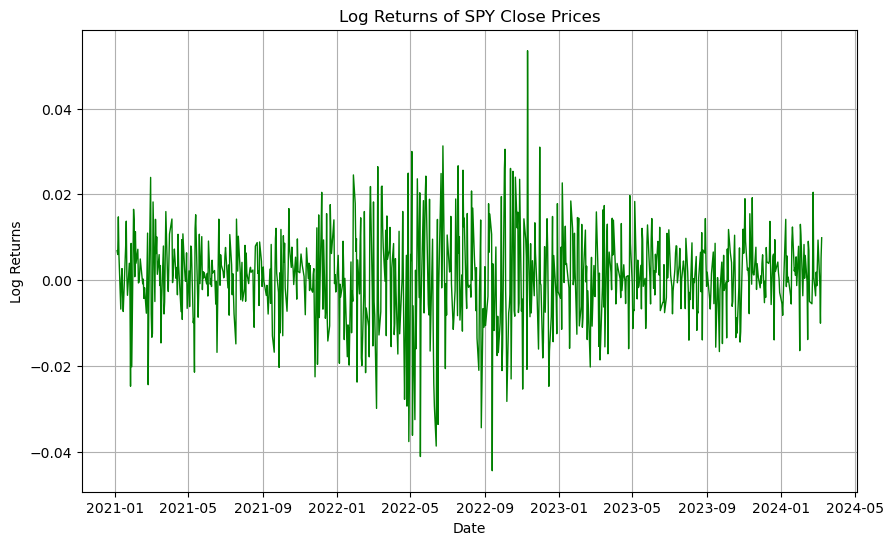

In [11]:
import matplotlib.pyplot as plt

# Assuming spy_returns is already computed as shown
# Plotting the log returns
plt.figure(figsize=(10, 6))
plt.plot(spy_returns, color='green', linewidth=1)
plt.title('Log Returns of SPY Close Prices')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.grid(True)
plt.show()


In [12]:
spy_garch = arch_model(spy_returns, p=1, q=1).fit(update_freq=5)
print(spy_garch.summary())

Iteration:      5,   Func. Count:     54,   Neg. LLF: 106036296162.15727
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2544.2466869885266
            Iterations: 8
            Function evaluations: 78
            Gradient evaluations: 6
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2544.25
Distribution:                  Normal   AIC:                          -5080.49
Method:            Maximum Likelihood   BIC:                          -5061.76
                                        No. Observations:                  798
Date:                Fri, Mar 29 2024   Df Residuals:                      797
Time:                        10:16:25   Df Model:                            1
       

/Users/lilyhuang/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001198. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


#### Final Model
Given the statistical significance of all parameters, the final model for the selected symbol can be written as:

$$
\sigma_t^2 = 2.417 \times 10^{-6} + 0.1000 \times \epsilon_{t-1}^2 + 0.8800 \times \sigma_{t-1}^2
$$

Here, $\epsilon_{t-1}^2$ is the lagged squared residual (the squared deviation of the previous time period's actual return from its mean), and $\sigma_{t-1}^2$ is the lagged conditional variance (yesterday's variance).


#### GARCH(1,1) Model Parameters:

1) Omega (ω): This is the constant term in the GARCH model volatility equation, which represents the long-term average variance. ω (omega) is approximately 0.000002417.

2) Alpha (α[1]): This is the parameter that measures the contribution of the lagged squared returns to the current variance.  α[1] is approximately 0.1000 with a standard error of 0.03670.

3) Beta (β[1]): This parameter measures the contribution of lagged conditional variance to the current variance. Here, β[1] is approximately 0.8800 with a standard error of 0.03330.

#### P-value Statistics:

1) The p-value for alpha (α[1]) is 0.006434(statistically significant).

2) The p-value for beta (β[1]) is significantly low, at 6.462e-154(statistically significant).

### Correlation

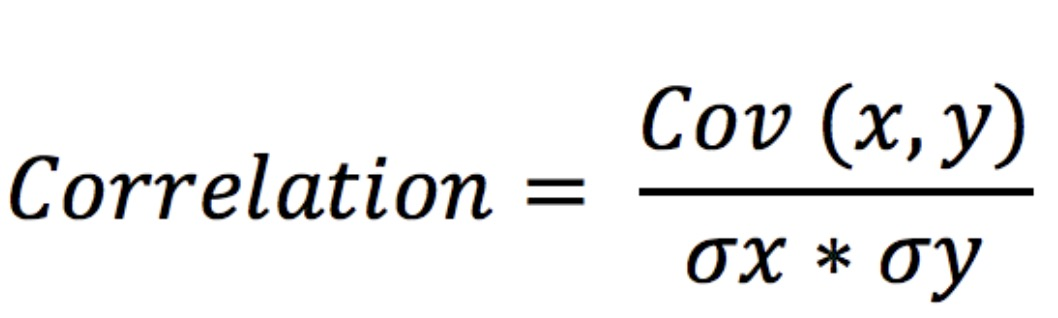

In [13]:
from IPython.display import Image
Image(filename = '/Users/lilyhuang/Desktop/WechatIMG51.jpg', width = 500, height = 500)

In [14]:
corr = axp_returns.corr(spy_returns)
print(f"Correlation between AXP and SPY: {corr:.4f}")

Correlation between AXP and SPY: 0.6597


## Historical Simulation VaR and ES Calculation
1) Defined the historical_var_es function to calculate historical simulation VaR and ES.
2) Calculated 99% confidence level VaR and ES for Portfolio A (1 million invested in AXP) and Portfolio B (1 million invested in SPY) independently.
3) Calculated 99% confidence level VaR and ES for Portfolio C (2 million invested, with 1 million each in AXP and SPY).
4) Computed the diversification benefit for Portfolio C, which is the sum of VaR for Portfolios A and B minus the VaR of Portfolio C.

Historical VaR for AXP (Portfolio A): $43,330.01
Historical ES for AXP (Portfolio A): $65,927.49


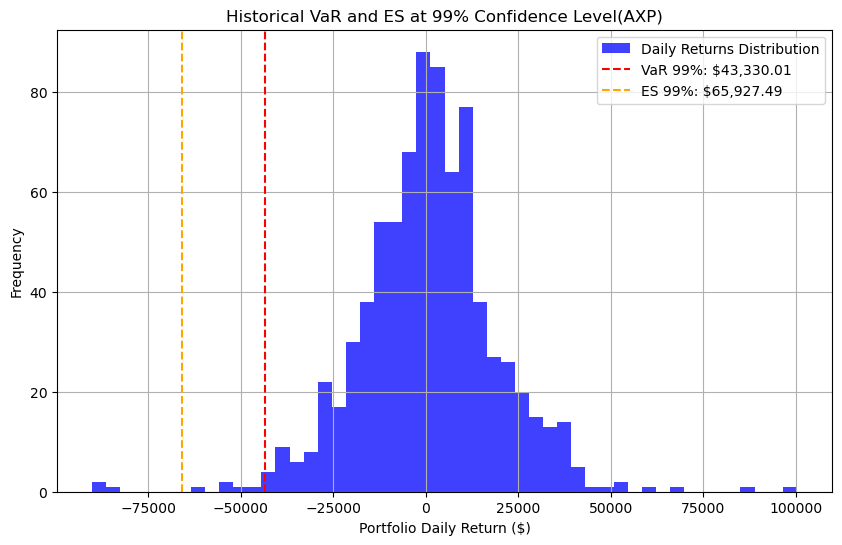

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Function to calculate historical VaR and ES
def historical_var_es(returns, alpha=0.99, portfolio_value=1e6):
    sorted_returns = returns.sort_values()
    var = -sorted_returns.quantile(1-alpha) * portfolio_value
    es = -sorted_returns[sorted_returns < -var/portfolio_value].mean() * portfolio_value
    return var, es

# Portfolio A
axp_var, axp_es = historical_var_es(axp_returns[:-1], portfolio_value=1e6)
print(f"Historical VaR for AXP (Portfolio A): ${axp_var:,.2f}")
print(f"Historical ES for AXP (Portfolio A): ${axp_es:,.2f}")

# Plotting the distribution of returns with VaR and ES highlighted
plt.figure(figsize=(10, 6))
plt.hist(axp_returns * 1e6, bins=50, alpha=0.75, color='blue', label='Daily Returns Distribution')
plt.axvline(x=-axp_var, color='red', linestyle='--', label=f'VaR 99%: ${axp_var:,.2f}')
plt.axvline(x=-axp_es, color='orange', linestyle='--', label=f'ES 99%: ${axp_es:,.2f}')

plt.legend()
plt.xlabel('Portfolio Daily Return ($)')
plt.ylabel('Frequency')
plt.title('Historical VaR and ES at 99% Confidence Level(AXP)')
plt.grid(True)
plt.show()

Historical VaR for SPY (Portfolio B): $30,027.18
Historical ES for SPY (Portfolio B): $37,348.56


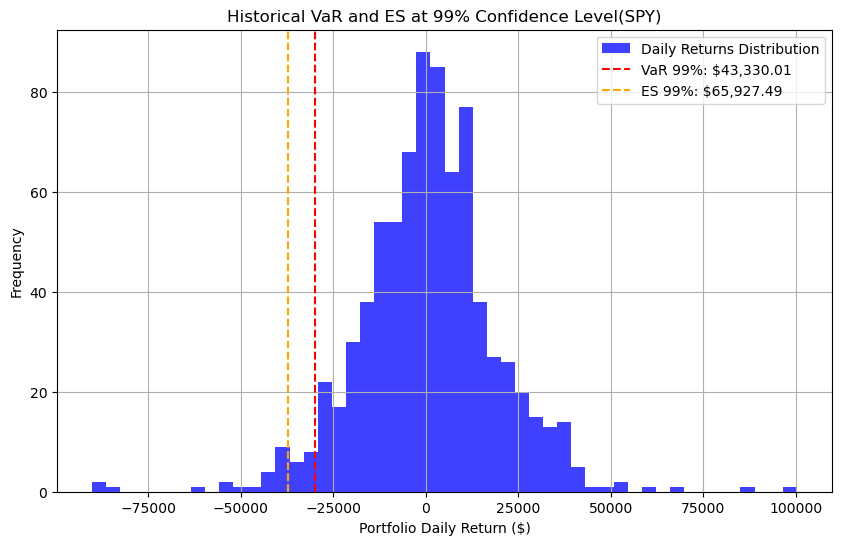

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Portfolio B 
spy_var, spy_es = historical_var_es(spy_returns[:-1], portfolio_value=1e6)
print(f"Historical VaR for SPY (Portfolio B): ${spy_var:,.2f}") 
print(f"Historical ES for SPY (Portfolio B): ${spy_es:,.2f}")

# Plotting the distribution of returns with VaR and ES highlighted
plt.figure(figsize=(10, 6))
plt.hist(axp_returns * 1e6, bins=50, alpha=0.75, color='blue', label='Daily Returns Distribution')
plt.axvline(x=-spy_var, color='red', linestyle='--', label=f'VaR 99%: ${axp_var:,.2f}')
plt.axvline(x=-spy_es, color='orange', linestyle='--', label=f'ES 99%: ${axp_es:,.2f}')

plt.legend()
plt.xlabel('Portfolio Daily Return ($)')
plt.ylabel('Frequency')
plt.title('Historical VaR and ES at 99% Confidence Level(SPY)')
plt.grid(True)
plt.show()

In [17]:
# Portfolio C
portfolio_c_returns = 0.5 * (axp_returns[:-1] + spy_returns[:-1])
portfolio_c_var, portfolio_c_es = historical_var_es(portfolio_c_returns, portfolio_value=2e6)
print(f"Historical VaR for Portfolio C: ${portfolio_c_var:,.2f}")
print(f"Historical ES for Portfolio C: ${portfolio_c_es:,.2f}")

Historical VaR for Portfolio C: $75,322.88
Historical ES for Portfolio C: $95,322.20


In [18]:
diversification_benefit = axp_var + spy_var - portfolio_c_var
print(f"Diversification benefit: ${diversification_benefit:,.2f}")

Diversification benefit: $-1,965.69


#### Understanding VaR and Diversification

When analyzing investment portfolios, one key concept is the *Value at Risk (VaR)*, which measures the potential loss in value of a risky asset or portfolio over a defined period for a given confidence interval. However, an interesting aspect of VaR is its interaction with portfolio diversification.

##### SPY and AXP

Consider two assets: SPY (an ETF that tracks the S&P 500) and AXP (American Express). For simplicity, let's say:

- `VaR(SPY)` represents the VaR of an investment in SPY.
- `VaR(AXP)` represents the VaR of an investment in AXP.
- `VaR(SPY + AXP)` represents the VaR of a portfolio combining SPY and AXP.

We might intuitively expect that diversifying across different assets would reduce the overall portfolio risk, implying that:
                              
                              VaR(SPY) + VaR(AXP) > VaR(SPY + AXP)
                              
However, due to the nature of VaR, it's possible to encounter situations where:

                              VaR(SPY) + VaR(AXP) < VaR(SPY + AXP)
                              
#### Lack of Diversification Benefit in VaR

This example illustrates that the VaR measure does not always capture the diversification benefits. The reason behind this is that VaR is **not a coherent risk measure** because it does not satisfy the **subadditivity condition**. Subadditivity is a property that ensures the risk of a combined portfolio should be less than or equal to the sum of the risks of the individual portfolios, promoting the concept of diversification benefit.



## Delta-Normal VaR Calculation
1) Calculated the covariance matrix for Portfolio C using the conditional volatilities estimated by the GARCH models and the correlation coefficient.
2) Computed the volatility of Portfolio C.
3) Calculated Delta-Normal VaR for AXP (Portfolio A), SPY (Portfolio B), and Portfolio C using the delta_normal_var function.

In [19]:
from scipy.stats import norm

portfolio_cov = 0.5**2 * np.var(axp_returns) + 0.5**2 * np.var(spy_returns) + np.cov(axp_returns, spy_returns)[0,1] * 2 * 0.5 * 0.5
port_sd = portfolio_cov**(1/2)
dn_portfolio_c_var = norm.ppf(0.01) * port_sd*2e6

dn_axp_var = norm.ppf(0.01) * (np.var(axp_returns)**(1/2) * 1e6)
dn_spy_var = norm.ppf(0.01) * (np.var(spy_returns)**(1/2) * 1e6) 

print(f"Delta-normal VaR for AXP (Portfolio A): ${dn_axp_var:,.2f}")
print(f"Delta-normal VaR for SPY (Portfolio B): ${dn_spy_var:,.2f}")
print(f"Delta-normal VaR for Portfolio C: ${dn_portfolio_c_var:,.2f}")

Delta-normal VaR for AXP (Portfolio A): $-43,512.77
Delta-normal VaR for SPY (Portfolio B): $-25,465.37
Delta-normal VaR for Portfolio C: $-63,290.42


#### The historical approach results in a higher VaR due to the following reasons:
1. Firstly, the assumption of normal distribution underestimates the probability of extreme events, as asset returns often show fat-tail characteristics, meaning the probability of extreme events is higher than predicted by the normal distribution. Historical VaR, by using historical data directly, captures these fat-tail characteristics more effectively. 
2. Secondly, historical VaR identifies non-linear risks, whereas Delta-Normal VaR assumes a linear relationship between asset risk and position size, overlooking the non-linear risk profiles of many financial assets like options. 
3. Finally, Delta-Normal VaR fails to account for the dynamic changes in correlations, typically using fixed correlation coefficients to describe asset relationships. However, in reality, these correlations can shift over time, especially under market stress when many asset correlations suddenly increase. Historical VaR, by utilizing historical data, can somewhat reflect these dynamic correlation changes.

## Risk-Adjusted Return Calculation
1) Defined the risk_adjusted_return function to calculate risk-adjusted returns, which is the net return of the portfolio divided by the Historical Expected Loss minus Historical VaR.
2) Calculated risk-adjusted returns for AXP (Portfolio A), SPY (Portfolio B), and Portfolio C.

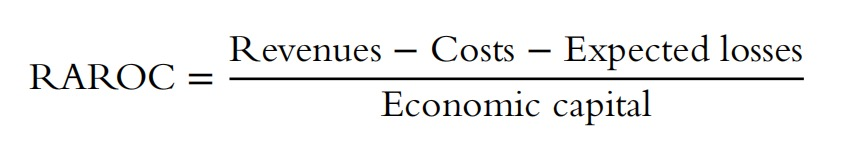

In [20]:
from IPython.display import Image
Image(filename = '/Users/lilyhuang/Desktop/WechatIMG7.jpg', width = 500, height = 500)

In [42]:
#AXP
revenue_AXP = (axp_data['Close'][-1]-axp_data['Close'][0])/ (axp_data['Close'][0])
expected_loss_AXP = axp_returns.mean()
var_AXP_without_Capital = np.quantile(axp_returns, 0.01)
RAROC_AXP = (revenue_AXP - expected_loss_AXP) / (-expected_loss_AXP - var_AXP_without_Capital)
print(f"Risk-adjusted return for AXP: {RAROC_AXP:.6f}")

Risk-adjusted return for AXP: 20.978974


In [41]:
#SPY
revenue_SPY = (spy_data['Close'][-1]- spy_data['Close'][0])/ (spy_data['Close'][0])
expected_loss_SPY = spy_returns.mean()
var_SPY_without_Capital = np.quantile(spy_returns, 0.01)
RAROC_SPY = (revenue_SPY - expected_loss_SPY) / (- expected_loss_SPY - var_SPY_without_Capital)
print(f"Risk-adjusted return for SPY: {RAROC_SPY:.6f}")

Risk-adjusted return for SPY: 13.370033


In [43]:
revenue_Port = 0.5 * revenue_AXP + 0.5 * revenue_SPY
expected_loss_Port = portfolio_c_returns.mean()
var_Port_without_Capital = np.quantile(portfolio_c_returns, 0.01)
RARACO_Port = (revenue_Port - expected_loss_Port) / ( -expected_loss_Port - var_Port_without_Capital)
print(f"Risk-adjusted return for Portfolio: {RARACO_Port :.6f}")

Risk-adjusted return for Portfolio: 17.364935


## Results:
1) Risk-adjusted return for AXP was  20.978974.
2) Risk-adjusted return for SPY was 13.370033.
3) Risk-adjusted return for Portfolio C was 17.364935.

Hence, portfolio A has the best risk adjusted performance.